In [21]:
 # Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import weather_api_key

#Import Data files:
new_zealand_df = pd.read_csv("airbb_data/new_zealand.csv")

new_zealand = new_zealand_df[['latitude', 'longitude']]

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
new_zealand.head()

,latitude,longitude
0,-38.13493,178.31671
1,-39.45078,173.84357
2,-38.99097,175.80902
3,-38.73298,177.58658
4,-37.67498,176.23216


In [18]:
new_zealand['city'] = new_zealand.apply(lambda row: citipy.nearest_city(row.latitude, row.longitude).city_name, axis = 1)

#for row in new_zealand:
 #   row = new_zealand.index
  #  new_zealand['city'] = citipy.nearest_city(new_zealand['latitude'][row], new_zealand['longitude'][row]).city_name



#city = citipy.nearest_city(new_zealand['latitude'], new_zealand['longitude']).city_name
    
# If the city is unique, then add it to a our cities list
#if city not in cities:
 #   cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
#print(cities)

C:\Users\Beverly\anaconda3\envs\case_python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
new_zealand.head()

,latitude,longitude,city
0,-38.13493,178.31671,tolaga bay
1,-39.45078,173.84357,opunake
2,-38.99097,175.80902,turangi
3,-38.73298,177.58658,manutuke
4,-37.67498,176.23216,tauranga


In [4]:
#Performing API Calls
#Fields:
#City, Lat
#    Lng
#   Max Temp
#  Humidity
# Cloudiness
#Wind Speed
#Country
#Date
#weather_json["main"]["temp"]

In [22]:
#Open weather information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

weather_df = new_zealand.copy()

#field_names
#empty lists for the fields of our future city weather csv
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

def extract_weather(city):
    name, lat, lng, temp_max, humidity, clouds, wind_speed, country, date = None, None, None, None, None, None, None, None, None
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        name = weather_json["name"]
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        temp_max = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        clouds = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
    except:
        pass
    return name, lat, lng, temp_max, humidity, clouds, wind_speed, country, date
    
def apply_row(row):
    city = row['city']
    name, lat = extract_weather(city)
    row['name'] = name
    row['lat'] = lat
    row['lng'] = weather_json["coord"]["lon"]
    temp_max = weather_json["main"]["temp_max"]
    humidity = weather_json["main"]["humidity"]
    clouds = weather_json["clouds"]["all"]
    wind_speed = weather_json["wind"]["speed"]
    country = weather_json["sys"]["country"]
    date = weather_json["dt"]
    
    
weather_df.apply(extract_weather, axis=1)


KeyboardInterrupt: 

In [ ]:
#for city in new_zealand(['city']):
    
    #Get the city's number
#    city_no = cities.index(city) + 1
    
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        
        

        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        #Put the city's weather into lists
        city_list.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        
        print(f"Getting {city}\'s weather information(City #{city_no})." )
    except KeyError:
        print(f"Can't find {city} (City #{city_no}) .")

In [30]:
#Putting city results into a csv
city_dict = {'City': city_list, 'Lat': lat, 'Lng': lng, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date}


In [32]:
zd = zip(*city_dict.values())
#, encoding='utf-8'

with open("output_data/cities.csv", 'w', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter=',', lineterminator = '\n')
    writer.writerow(city_dict.keys())
    writer.writerows(zd)


In [35]:
#Dataframe of our city data
city_df = pd.read_csv("output_data/cities.csv")
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,59.00,90,0,16.04,AU,1608418814
1,Hermanus,-34.42,19.23,62.01,90,0,1.01,ZA,1608419152
2,Port Alfred,-33.59,26.89,72.00,96,6,3.00,ZA,1608419176
3,Linares,-35.85,-71.60,72.36,33,36,13.02,CL,1608419311
4,Pevek,69.70,170.31,1.26,90,0,6.13,RU,1608419146


In [36]:
#making sure there's no cities where the humidity is over 100
error_df = city_df[city_df["Humidity"] > 100]
error_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#Plotting Temperature(F) vs Latitude:

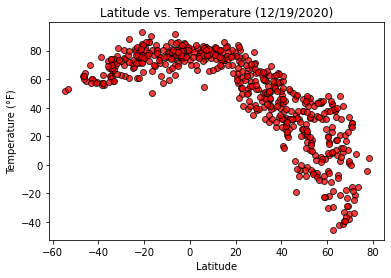

Plotting Temperature(F) vs Latitude: The code here is getting the latitude and Max temperature from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is temperature dependent on latitude?


In [104]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.ylabel('Temperature (°F)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Temperature (12/19/2020)")
plt.savefig("images/latitude_temp_all.png")
plt.show()

print("Plotting Temperature(F) vs Latitude: The code here is getting the latitude and Max temperature from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is temperature dependent on latitude?")

In [ ]:
#Humidity(%) vs. Latitude


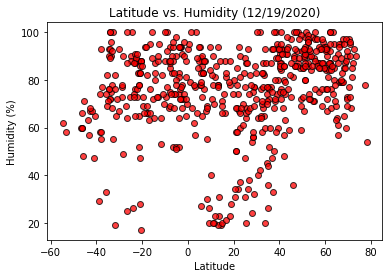

Humidity(%) vs. Latitude: The code here is getting the latitude and percent of humidity from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is humidity dependent on latitude?


In [105]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Humidity (12/19/2020)")
plt.savefig("images/latitude_humd_all.png")
plt.show()

print("Humidity(%) vs. Latitude: The code here is getting the latitude and percent of humidity from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is humidity dependent on latitude?")

In [ ]:
#Cloudiness(%) vs. Latitude


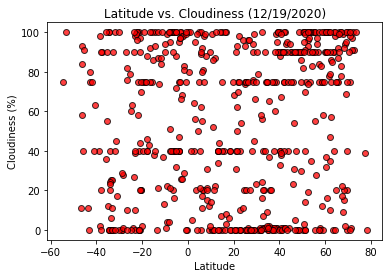

Cloudiness(%) vs. Latitude: The code here is getting the latitude and percent of cloudiness from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is cloudiness dependent on latitude?


In [106]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Cloudiness (12/19/2020)")
plt.savefig("images/latitude_cloud_all.png")
plt.show()

print("Cloudiness(%) vs. Latitude: The code here is getting the latitude and percent of cloudiness from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is cloudiness dependent on latitude?")

In [ ]:
#Wind Speed(mph) vs. Latitude


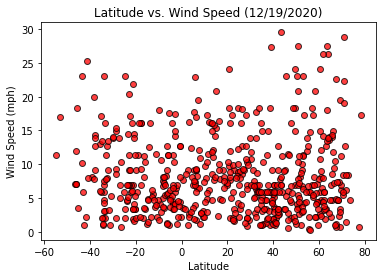

Wind Speed(mph) vs. Latitude: The code here is getting the latitude and wind speed (in mph) from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is wind speed dependent on latitude?


In [107]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Wind Speed (12/19/2020)")
plt.savefig("images/latitude_wind_all.png")
plt.show()

print("Wind Speed(mph) vs. Latitude: The code here is getting the latitude and wind speed (in mph) from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is wind speed dependent on latitude?")

In [51]:
#Northern dataframe
north_df = city_df[city_df["Lat"] >= 0]
north_df
#Southern dataframe
south_df = city_df[city_df["Lat"] < 0]
south_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,59.00,90,0,16.04,AU,1608418814
1,Hermanus,-34.42,19.23,62.01,90,0,1.01,ZA,1608419152
2,Port Alfred,-33.59,26.89,72.00,96,6,3.00,ZA,1608419176
3,Linares,-35.85,-71.60,72.36,33,36,13.02,CL,1608419311
6,Cape Town,-33.93,18.42,66.99,72,0,23.04,ZA,1608419145
...,...,...,...,...,...,...,...,...,...
537,Bourail,-21.57,165.48,80.98,52,0,6.08,NC,1608419461
539,Masuguru,-11.37,38.42,75.16,82,100,3.89,TZ,1608419461
550,Vredendal,-31.67,18.50,63.81,76,0,3.20,ZA,1608419463
552,Batemans Bay,-35.72,150.18,69.01,74,100,6.08,AU,1608419463


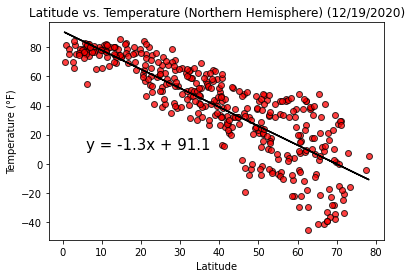

The R-value is -0.8409614361930593.
The R squared value is 0.707216137163893.


In [108]:
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_df["Lat"], north_df["Max Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.ylabel('Temperature (°F)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Temperature (Northern Hemisphere) (12/19/2020)")
plt.savefig("images/latitude_temp_north.png")
plt.show()

print(f"The R-value is {rvalue}.")
print(f"The R squared value is {rvalue**2}.")

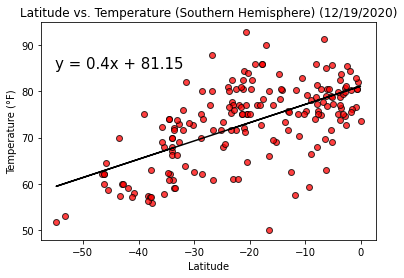

The R-value is 0.6102303588207549.
The R squared value is 0.37238109082650733.
Analyzing Latitude vs. Temperature in the northern and sourthern hemispheres: Temperature is correlated to Latitude in both the northern and southern hemispheres. In the northern hemisphere, there is a strong negative correlation. As the latitude increases, the temperatures go down. The opposite happens in the southern hemisphere where the temperature rises as the latitude goes up. We know that the number for latitude increases in the northern hemisphere as we move away from the equator. The opposite happens for the southern hemisphere. We know that the temperatures are warmer around the equator, so our findings make sense: as you move away from the equator, the temperature goes down. The data is more strongly correlated and closer to the regression line for the Northern Hemisphere. I am suspecting this is in part because there is more land in general and spread out through the Northern Hemisphere than the S

In [109]:
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_df["Lat"], south_df["Max Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(-55,85),fontsize=15,color="black")
plt.ylabel('Temperature (°F)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Temperature (Southern Hemisphere) (12/19/2020)")
plt.savefig("images/latitude_temp_south.png")
plt.show()

print(f"The R-value is {rvalue}.")
print(f"The R squared value is {rvalue**2}.")
print("Analyzing Latitude vs. Temperature in the northern and sourthern hemispheres: Temperature is correlated to Latitude in both the northern and southern hemispheres. In the northern hemisphere, there is a strong negative correlation. As the latitude increases, the temperatures go down. The opposite happens in the southern hemisphere where the temperature rises as the latitude goes up. We know that the number for latitude increases in the northern hemisphere as we move away from the equator. The opposite happens for the southern hemisphere. We know that the temperatures are warmer around the equator, so our findings make sense: as you move away from the equator, the temperature goes down. The data is more strongly correlated and closer to the regression line for the Northern Hemisphere. I am suspecting this is in part because there is more land in general and spread out through the Northern Hemisphere than the Southern Hemisphere. If we used data regarding temperatures on the globe that are not specifically tied to cities, would the correlation measures be more closely aligned between hemisphere?")

In [ ]:
#Analyzing Humidity vs. Latitude for northern and southern hemispheres

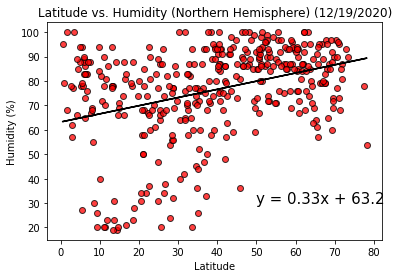

The R-value is 0.3543436971759083.
The R squared value is 0.1255594557282918.


In [110]:
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_df["Lat"], north_df["Humidity"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(50,30),fontsize=15,color="black")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Humidity (Northern Hemisphere) (12/19/2020)")
plt.savefig("images/latitude_hum_north.png")
plt.show()

print(f"The R-value is {rvalue}.")
print(f"The R squared value is {rvalue**2}.")

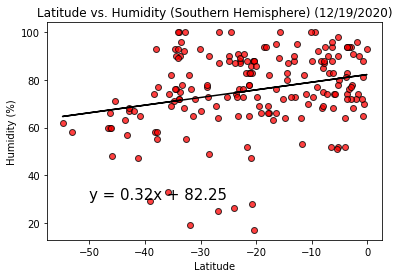

The R-value is 0.26242046745811.
The R squared value is 0.06886450174093296.
Based on our regression coefficient values, there is either no correlation at all between humidity and latitude, or it is very weak. This implies that humidity is probably not dependent on latitude.


In [111]:
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_df["Lat"], south_df["Humidity"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(-50,30),fontsize=15,color="black")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Humidity (Southern Hemisphere) (12/19/2020)")
plt.savefig("images/latitude_hum_south.png")
plt.show()

print(f"The R-value is {rvalue}.")
print(f"The R squared value is {rvalue**2}.")
print("Based on our regression coefficient values, there is either no correlation at all between humidity and latitude, or it is very weak. This implies that humidity is probably not dependent on latitude.")

In [ ]:
#Analyzing Cloudiness vs. Latitude for northern and southern hemispheres

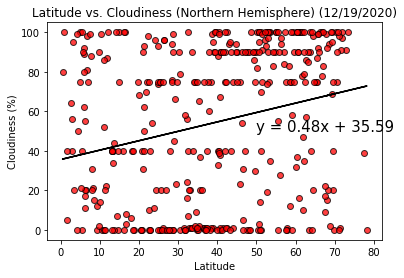

The R-value is 0.24586262702442058.
The R squared value is 0.06044843136734934.


In [112]:
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_df["Lat"], north_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(50,50),fontsize=15,color="black")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Cloudiness (Northern Hemisphere) (12/19/2020)")
plt.savefig("images/latitude_cloud_north.png")
plt.show()

print(f"The R-value is {rvalue}.")
print(f"The R squared value is {rvalue**2}.")

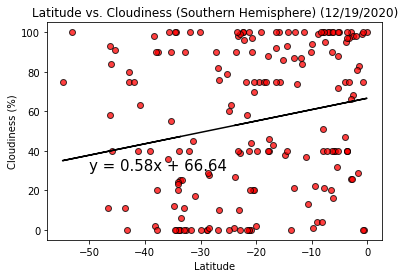

The R-value is 0.2073760432660272.
The R squared value is 0.04300482332067319.
Our analysis here would suggest that the percent of clouds at any particular place are not dependent on what latitude that place is at.


In [113]:
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_df["Lat"], south_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(-50,30),fontsize=15,color="black")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Cloudiness (Southern Hemisphere) (12/19/2020)")
plt.savefig("images/latitude_cloud_south.png")
plt.show()

print(f"The R-value is {rvalue}.")
print(f"The R squared value is {rvalue**2}.")
print("Our analysis here would suggest that the percent of clouds at any particular place are not dependent on what latitude that place is at.")

In [ ]:
#Analysis on Wind Speed vs. Latitude

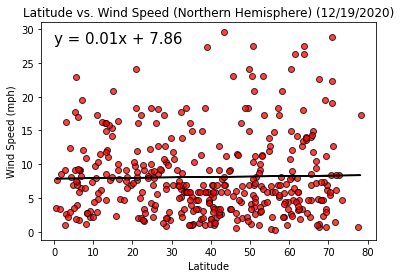

The R-value is 0.021643013989437528.
The R squared value is 0.0004684200545469885.


In [114]:
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_df["Lat"], north_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0,28),fontsize=15,color="black")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Wind Speed (Northern Hemisphere) (12/19/2020)")
plt.savefig("images/latitude_wind_north.png")
plt.show()

print(f"The R-value is {rvalue}.")
print(f"The R squared value is {rvalue**2}.")

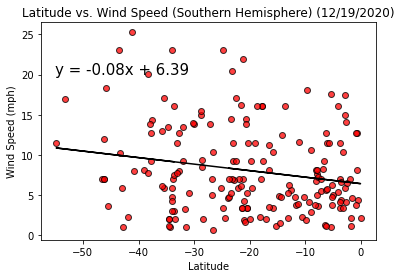

The R-value is -0.20103663294088914.
The R squared value is 0.04041572778420979.
We're measuring wind speed's dependence on latitude, but there doesn't seem to be any.


In [115]:
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_df["Lat"], south_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(-55,20),fontsize=15,color="black")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Wind Speed (Southern Hemisphere) (12/19/2020)")
plt.savefig("images/latitude_wind_south.png")
plt.show()

print(f"The R-value is {rvalue}.")
print(f"The R squared value is {rvalue**2}.")
print("We're measuring wind speed's dependence on latitude, but there doesn't seem to be any.")